In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import mglearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import numpy as np
data =pd.read_csv('C:\chicago_crimes_2012_to_2017.csv',encoding='utf-8',error_bad_lines=False)

D:\ANACONDA\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
D:\ANACONDA\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
dp=pd.DataFrame(data)

In [3]:
display(dp)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,6,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,3384640,10111143,HY299674,06/13/2015 04:12:00 PM,036XX W GRENSHAW ST,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,...,24.0,29.0,14,1152278.0,1894797.0,2015,08/17/2015 03:03:40 PM,41.867188,-87.716440,"(41.86718783, -87.71644019)"
1048571,3384641,10111144,HY300084,06/13/2015 09:30:00 PM,014XX S MUSEUM CAMPUS DR,870,THEFT,POCKET-PICKING,STREET,False,...,2.0,33.0,6,1179970.0,1893558.0,2015,08/17/2015 03:03:40 PM,41.863197,-87.614818,"(41.863196881, -87.614817819)"
1048572,3384642,10111146,HY300059,06/13/2015 09:40:00 PM,023XX W LAWRENCE AVE,460,BATTERY,SIMPLE,SIDEWALK,True,...,47.0,4.0,08B,1159650.0,1931817.0,2015,08/17/2015 03:03:40 PM,41.968625,-87.688354,"(41.96862488, -87.688354349)"
1048573,3384643,10111147,HY299981,06/13/2015 08:40:00 PM,051XX W THOMAS ST,313,ROBBERY,ARMED: OTHER DANGEROUS WEAPON,SIDEWALK,False,...,37.0,25.0,3,1141687.0,1906835.0,2015,08/17/2015 03:03:40 PM,41.900424,-87.755024,"(41.900423863, -87.755023892)"


In [4]:
#从表格中我们看出，犯罪类型特别的多，接下来我们可视化一下数据，看一下各种犯罪类型的分布情况。

In [5]:
data["Primary Type"].value_counts()

THEFT                                236724
BATTERY                              188826
NARCOTICS                            110781
CRIMINAL DAMAGE                      109031
ASSAULT                               64049
OTHER OFFENSE                         61711
BURGLARY                              61458
DECEPTIVE PRACTICE                    48697
MOTOR VEHICLE THEFT                   43981
ROBBERY                               39737
CRIMINAL TRESPASS                     27523
WEAPONS VIOLATION                     12112
PUBLIC PEACE VIOLATION                10313
OFFENSE INVOLVING CHILDREN             7852
PROSTITUTION                           6324
INTERFERENCE WITH PUBLIC OFFICER       4577
CRIM SEXUAL ASSAULT                    4449
SEX OFFENSE                            3330
GAMBLING                               1853
LIQUOR LAW VIOLATION                   1593
ARSON                                  1459
KIDNAPPING                              795
STALKING                        

In [6]:
#再画出条形图便于观察哪类犯罪数量最多

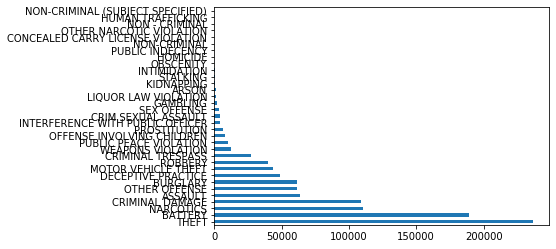

In [7]:
data["Primary Type"].value_counts().plot(kind='barh')

In [8]:
#这里我们可以看出犯罪率最高的几种和犯罪率最低的几种分别是哪些类型。但是这些数据我们只是看到了哪些犯罪的类型多，好做出一些措施，但是不能为政府和公安机关等部门做出很好的预警效果。接下来打算利用热力地图的方式来做犯罪预警。

In [9]:
data['Year'].value_counts()

2012    334715
2013    305738
2014    273222
2015    109685
2016     25215
Name: Year, dtype: int64

In [10]:
#以年份为检索出每年的总共的案件数量

In [11]:
#从上面画的条形图可以看出THEFT盗窃案件最多，下面我们利用THEFT犯罪类型来做预警展示。

In [12]:
Theft=data.loc[data["Primary Type"]=="THEFT"]

In [13]:
Theft.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,6,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"
12,2193,10508717,HZ250415,05/03/2016 05:30:00 PM,011XX W JACKSON BLVD,890,THEFT,FROM BUILDING,OTHER,False,...,2.0,28.0,6,1168776.0,1898793.0,2016,05/10/2016 03:56:50 PM,41.877812,-87.655758,"(41.877811861, -87.655758012)"
13,2279,10508724,HZ250513,05/03/2016 09:00:00 AM,028XX S DR MARTIN LUTHER KING JR DR,820,THEFT,$500 AND UNDER,STREET,False,...,4.0,35.0,6,1179375.0,1886199.0,2016,05/10/2016 03:56:50 PM,41.843017,-87.617227,"(41.843016958, -87.61722727)"
14,2477,10508728,HZ250505,05/03/2016 10:08:00 PM,016XX N CLAREMONT AVE,810,THEFT,OVER $500,STREET,False,...,1.0,24.0,6,1160444.0,1910787.0,2016,05/10/2016 03:56:50 PM,41.910901,-87.686019,"(41.910900826, -87.686018747)"
16,3023,10508738,HZ250440,05/03/2016 09:45:00 PM,020XX W LE MOYNE ST,810,THEFT,OVER $500,STREET,False,...,1.0,24.0,6,1162515.0,1909832.0,2016,05/10/2016 03:56:50 PM,41.908237,-87.678437,"(41.908237096, -87.678437417)"


In [14]:
#现在都变成了Theft的犯罪类型了。接下来我们对Theft犯罪类型做一些深度的挖掘分析。

In [15]:
#看一下是什么原因造成的偷窃犯罪
Theft["Description"].value_counts()

$500 AND UNDER                      98566
OVER $500                           52699
FROM BUILDING                       33862
RETAIL THEFT                        29786
POCKET-PICKING                       7129
FINANCIAL ID THEFT: OVER $300        6769
PURSE-SNATCHING                      2828
FINANCIAL ID THEFT:$300 &UNDER       2141
ATTEMPT THEFT                        1663
ATTEMPT FINANCIAL IDENTITY THEFT      737
AGG: FINANCIAL ID THEFT               294
DELIVERY CONTAINER THEFT              131
FROM COIN-OP MACHINE/DEVICE           119
Name: Description, dtype: int64

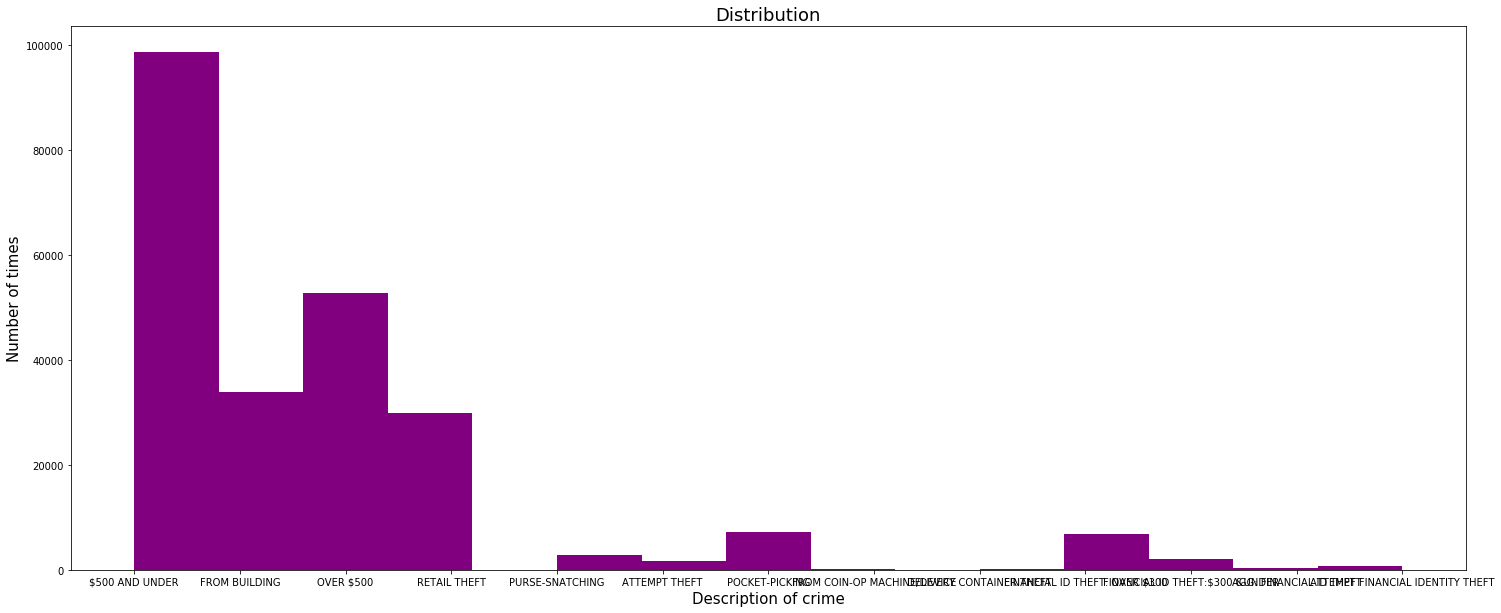

In [16]:

data1=list(Theft["Description"])

plt.figure(figsize=(25,10))

plt.hist(data1,bins=15,color="purple")

plt.xlabel("Description of crime",fontsize=15)

plt.ylabel("Number of times",fontsize=15)

plt.title("Distribution",fontsize=18)

plt.show()


In [17]:
#这样很明显看到，犯罪描述大部分是“$500 AND UNDER”。

In [18]:
#下一步，我们尝试把分析的粒度做得更加细致——研究一下，哪些街区比较危险

In [19]:
data2=Theft["Block"].value_counts()

In [20]:
print(data2)

001XX N STATE ST            1663
008XX N MICHIGAN AVE        1443
076XX S CICERO AVE          1337
0000X N STATE ST            1139
046XX W NORTH AVE            733
                            ... 
012XX E 50TH ST                1
059XX S NARRAGANSETT AVE       1
045XX W HOMER ST               1
107XX S DREW ST                1
028XX S ELLIS AVE              1
Name: Block, Length: 26741, dtype: int64


In [21]:
#可以看出001XX N STATE ST街区发生盗窃的案件最多，案发率最高。

In [22]:
Theft.groupby('Location Description').size().sort_values(ascending=False)

Location Description
STREET                          56551
RESIDENCE                       23979
APARTMENT                       14652
OTHER                           13496
DEPARTMENT STORE                12030
                                ...  
CREDIT UNION                        8
VEHICLE - OTHER RIDE SERVICE        7
VEHICLE - DELIVERY TRUCK            6
CTA TRACKS - RIGHT OF WAY           4
HIGHWAY/EXPRESSWAY                  4
Length: 101, dtype: int64

In [23]:
#根据结果显示，街道上偷窃次数最多，在高速公路发生的次数最少。

In [24]:
!pip install python-dateutil

In [25]:
from dateutil.parser import *

In [26]:
Theft["month"] = Theft.Date.apply(lambda x: parse(x).month)

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
Theft["hour"] = Theft.Date.apply(lambda x: parse(x).hour)

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
Theft["year"] = Theft.Date.apply(lambda x: parse(x).year)


D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
Theft.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,month,hour,year
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,820,THEFT,$500 AND UNDER,RESIDENCE,False,...,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)",5,22,2016
12,2193,10508717,HZ250415,05/03/2016 05:30:00 PM,011XX W JACKSON BLVD,890,THEFT,FROM BUILDING,OTHER,False,...,1168776.0,1898793.0,2016,05/10/2016 03:56:50 PM,41.877812,-87.655758,"(41.877811861, -87.655758012)",5,17,2016
13,2279,10508724,HZ250513,05/03/2016 09:00:00 AM,028XX S DR MARTIN LUTHER KING JR DR,820,THEFT,$500 AND UNDER,STREET,False,...,1179375.0,1886199.0,2016,05/10/2016 03:56:50 PM,41.843017,-87.617227,"(41.843016958, -87.61722727)",5,9,2016
14,2477,10508728,HZ250505,05/03/2016 10:08:00 PM,016XX N CLAREMONT AVE,810,THEFT,OVER $500,STREET,False,...,1160444.0,1910787.0,2016,05/10/2016 03:56:50 PM,41.910901,-87.686019,"(41.910900826, -87.686018747)",5,22,2016
16,3023,10508738,HZ250440,05/03/2016 09:45:00 PM,020XX W LE MOYNE ST,810,THEFT,OVER $500,STREET,False,...,1162515.0,1909832.0,2016,05/10/2016 03:56:50 PM,41.908237,-87.678437,"(41.908237096, -87.678437417)",5,21,2016


In [30]:
Theft.groupby('year').size()

year
2012    75438
2013    71493
2014    61466
2015    22815
2016     5512
dtype: int64

In [ ]:
#数量最少的是 2016年，我们读取的数据时发现2016年数据并不全。

In [31]:
#按照年度来看看偷窃犯罪数量的变化趋势。

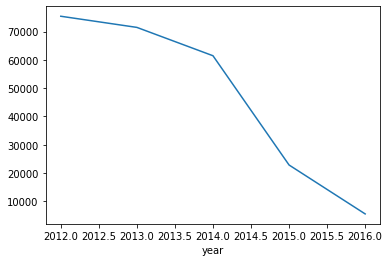

In [32]:
Theft.groupby('year').size().plot()

In [33]:
#不同月份之间，是否有明显的抢劫犯罪发生数量差别。

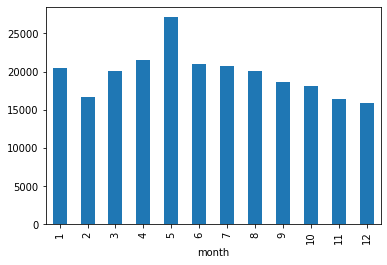

In [34]:
Theft.groupby('month').size().plot(kind='bar')

In [35]:
#从 2012到 2016年，5月犯罪数量较多，2月好一些。

In [36]:
#下面把2014年的月份犯罪记录统计做可视化

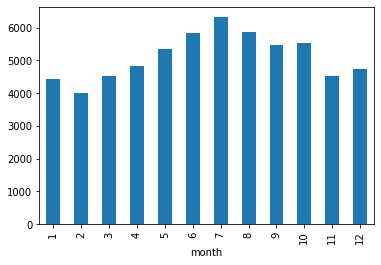

In [39]:
Theft[Theft.year==2014].groupby('month').size().plot(kind='bar')

In [40]:
#2014年的2月相对安全，7月份需要注意安全

In [41]:
#下面我们来看看，偷窃一般发生在什么时间。

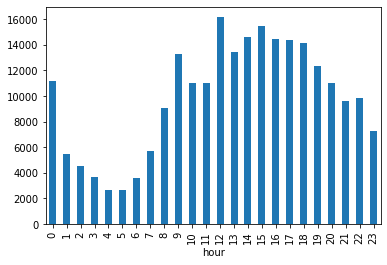

In [42]:
Theft.groupby('hour').size().plot(kind='bar')

In [ ]:
#从总体数据上看，早上时发生偷窃的几率比较少，12点过后是偷窃高发时刻